# 优化等级标注预测详细流程——特征筛选

In [1]:
# 引入工程所需要的库
from pyecharts import online
online() # 使用远程 jshost

In [2]:
import numpy as np
import pandas as pd 

In [3]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# 1. 加载数据

In [4]:
train_data = pd.read_csv('G://train_data.csv')
test_data = pd.read_csv('G://test_data.csv')
columns = train_data.columns
train_data = pd.DataFrame(train_data.values.astype(int), columns=columns)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29710 entries, 0 to 29709
Data columns (total 100 columns):
suitCount1    29710 non-null int32
suitCount2    29710 non-null int32
suitCount3    29710 non-null int32
suitCount4    29710 non-null int32
rank1         29710 non-null int32
rank2         29710 non-null int32
rank3         29710 non-null int32
rank4         29710 non-null int32
rank5         29710 non-null int32
rank6         29710 non-null int32
rank7         29710 non-null int32
rank8         29710 non-null int32
rank9         29710 non-null int32
rank10        29710 non-null int32
rank11        29710 non-null int32
rank12        29710 non-null int32
rank13        29710 non-null int32
rankCount1    29710 non-null int32
rankCount2    29710 non-null int32
rankCount3    29710 non-null int32
rankCount4    29710 non-null int32
diff2_1       29710 non-null int32
diff3_2       29710 non-null int32
diff4_3       29710 non-null int32
diff5_4       29710 non-null int32
diff6_5       2

In [6]:
train_data.head()

,suitCount1,suitCount2,suitCount3,suitCount4,rank1,rank2,rank3,rank4,rank5,rank6,...,diff11_2,diff12_3,diff13_4,diff11_1,diff12_2,diff13_3,diff12_1,diff13_2,diff13_1,hand
0,0,0,5,0,1,0,0,0,0,0,...,1,1,1,0,1,1,0,1,0,1
1,0,0,0,5,1,0,0,0,0,0,...,1,1,1,0,1,1,0,1,0,1
2,0,5,0,0,1,0,0,0,0,0,...,1,1,1,0,1,1,0,1,0,1
3,5,0,0,0,1,0,0,0,0,0,...,1,1,1,0,1,1,0,1,0,1
4,5,0,0,0,1,0,0,0,0,0,...,1,1,1,0,1,1,0,1,0,1


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 99 columns):
suitCount1    1000000 non-null int64
suitCount2    1000000 non-null int64
suitCount3    1000000 non-null int64
suitCount4    1000000 non-null int64
rank1         1000000 non-null int64
rank2         1000000 non-null int64
rank3         1000000 non-null int64
rank4         1000000 non-null int64
rank5         1000000 non-null int64
rank6         1000000 non-null int64
rank7         1000000 non-null int64
rank8         1000000 non-null int64
rank9         1000000 non-null int64
rank10        1000000 non-null int64
rank11        1000000 non-null int64
rank12        1000000 non-null int64
rank13        1000000 non-null int64
rankCount1    1000000 non-null int64
rankCount2    1000000 non-null int64
rankCount3    1000000 non-null int64
rankCount4    1000000 non-null int64
diff2_1       1000000 non-null int64
diff3_2       1000000 non-null int64
diff4_3       1000000 non-null int64


In [8]:
test_data.head()

,suitCount1,suitCount2,suitCount3,suitCount4,rank1,rank2,rank3,rank4,rank5,rank6,...,diff10_1,diff11_2,diff12_3,diff13_4,diff11_1,diff12_2,diff13_3,diff12_1,diff13_2,diff13_1
0,1,2,0,2,0,2,0,0,0,1,...,0,2,0,0,0,2,0,0,2,0
1,1,1,1,2,2,0,1,0,0,0,...,2,0,0,0,2,1,1,1,0,2
2,2,1,1,1,0,0,0,1,1,0,...,0,0,1,1,0,1,0,1,0,0
3,1,2,2,0,0,0,2,0,0,0,...,1,0,2,0,0,0,2,0,0,0
4,0,1,3,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,1


# 1.  利用不同的模型来对特征进行筛选，选出较为重要的特征：

In [9]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
def get_top_n_features(train_data_X, train_data_Y, train_data_columns, top_n_features):
    
    #randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=25,cv=10,verbose=1)
    rf_grid.fit(train_data_X, train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(train_data_X, train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(train_data_columns), 'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Feeatures from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=25,cv=10,verbose=1)
    ada_grid.fit(train_data_X, train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(train_data_X, train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(train_data_columns),
                                           'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=25,cv=10,verbose=1)
    et_grid.fit(train_data_X, train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(train_data_X, train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(train_data_columns),
                                          'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=25,cv=10,verbose=1)
    gb_grid.fit(train_data_X, train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(train_data_X, train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(train_data_columns),
                                          'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=25,cv=10,verbose=1)
    dt_grid.fit(train_data_X, train_data_Y)
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(train_data_X, train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(train_data_columns),
                                          'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_et,features_top_n_gb,features_top_n_dt],
                              ignore_index=True).drop_duplicates()
    features_importance = pd.concat([feature_imp_sorted_rf,feature_imp_sorted_ada,feature_imp_sorted_et,
                                     feature_imp_sorted_gb,feature_imp_sorted_dt],ignore_index=True)
    
    return features_top_n,features_importance

## 1.1  依据筛选出的特征构建训练集和测试集

在进行特征工程的过程中，产生了大量的特征，而特征与特征之间会存在一定的相关性。太多的特征一方面会影响训练的速度，另一方面也可能会使得模型过拟合。所以在特征太多的情况下，我们可以利用不同的模型对特征进行筛选，选取我们想要的前n个特征。

In [10]:
train_data_X = train_data.drop(['hand'], axis=1)
train_data_Y = train_data.hand


In [11]:
feature_to_pick = 20
train_data_columns = train_data_X.columns
feature_top_n, feature_importance = get_top_n_features(train_data_X, train_data_Y, train_data_columns, feature_to_pick)
train_data_X = train_data_X[feature_top_n]
test_data_X = test_data[feature_top_n]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:  2.1min remaining:  1.1min
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  2.5min finished


Top N Features Best RF Params:{'min_samples_split': 2, 'n_estimators': 500, 'max_depth': 20}
Top N Features Best RF Score:1.0
Top N Features RF Train Score:1.0
Sample 10 Feeatures from RF Classifier
17    rankCount1
18    rankCount2
19    rankCount3
2     suitCount3
1     suitCount2
0     suitCount1
3     suitCount4
65       diff8_3
20    rankCount4
73       diff9_3
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:  4.8min remaining:  2.6min
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  5.5min finished


Top N Features Best Ada Params:{'n_estimators': 500, 'learning_rate': 0.1}
Top N Features Best Ada Score:0.551565129585998
Top N Features Ada Train Score:0.686772130595759
Sample 10 Features from Ada Classifier:
17    rankCount1
66       diff9_4
79       diff9_2
18    rankCount2
29      diff10_9
20    rankCount4
19    rankCount3
73       diff9_3
72       diff8_2
71       diff7_1
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:  2.2min remaining:  1.2min
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  2.5min finished


Top N Features Best ET Params:{'min_samples_split': 3, 'n_estimators': 500, 'max_depth': 20}
Top N Features Best DT Score:1.0
Top N Features ET Train Score:1.0
Sample 10 Features from ET Classifier:
17    rankCount1
18    rankCount2
19    rankCount3
2     suitCount3
0     suitCount1
1     suitCount2
20    rankCount4
3     suitCount4
65       diff8_3
28       diff9_8
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed: 34.3min remaining: 18.5min
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed: 38.9min finished


Top N Features Best GB Params:{'n_estimators': 500, 'learning_rate': 0.01, 'max_depth': 20}
Top N Features Best GB Score:0.9997980477953551
Top N Features GB Train Score:1.0
Sample 10 Feature from GB Classifier:
17    rankCount1
18    rankCount2
2     suitCount3
65       diff8_3
20    rankCount4
19    rankCount3
93      diff11_1
67      diff10_5
3     suitCount4
14        rank11
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   13.6s remaining:    7.3s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   18.8s finished


Top N Features Bset DT Params:{'min_samples_split': 2, 'max_depth': 20}
Top N Features Best DT Score:0.998889262874453
Top N Features DT Train Score:0.9999663412992259
Sample 10 Features from DT Classifier:
17    rankCount1
65       diff8_3
19    rankCount3
18    rankCount2
0     suitCount1
66       diff9_4
1     suitCount2
67      diff10_5
64       diff7_2
3     suitCount4
Name: feature, dtype: object


## 1.2 用视图可视化不同算法筛选的特征排序：

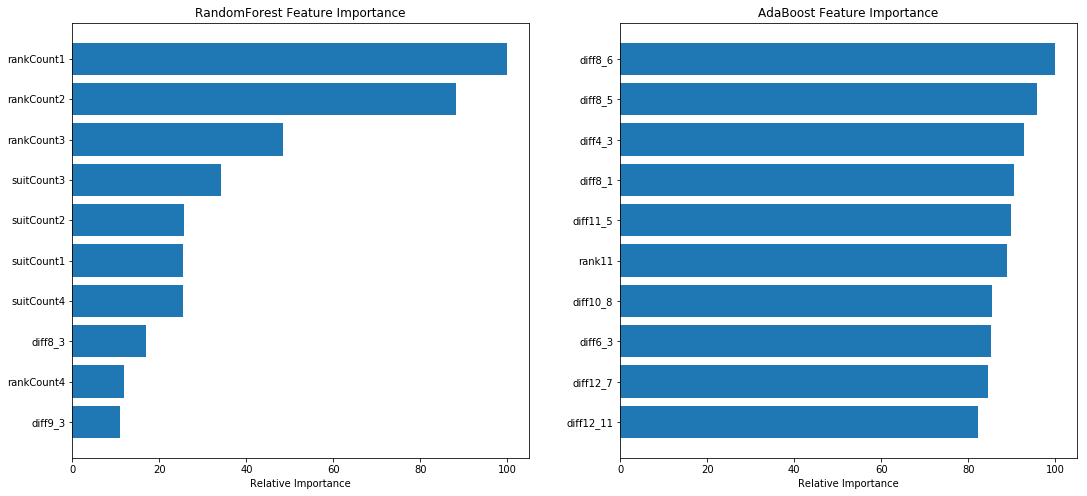

In [12]:
rf_feature_imp = feature_importance[:10]
#Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)
Ada_feature_imp = feature_importance[20:20+10].reset_index(drop=True)
 
# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())
 
# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]
 
# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(rf_important_idx.shape[0]) + .5
 
plt.figure(1, figsize = (18, 8))
 
plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')
 
plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')
 
plt.show()

## 1.3 将筛选的最重要的特征保存下来

In [13]:
importance_feature = pd.DataFrame(feature_top_n.values, columns=['importance_feature'])
importance_feature.to_csv('G://importance_feature_data.csv', index=False)

In [14]:
importance_feature

,importance_feature
0,rankCount1
1,rankCount2
2,rankCount3
3,suitCount3
4,suitCount2
5,suitCount1
6,suitCount4
7,diff8_3
8,rankCount4
9,diff9_3
